# Dataset

## Imports and constants

In [2]:
import torch
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dataset import CoLeafDataset

In [3]:
GRAPH_OUTPUT    = './output/graphs'
DATASET_PATH   = './output/datasets/dataset.pt'

In [5]:
dataset: CoLeafDataset = torch.load(DATASET_PATH, weights_only=False)

## Overview
The dataset consists of images of coffee leaves with varios nutrient deficiencies.

In [9]:
images = []
for i in range(max(dataset.labels)+1):
    images.append(dataset.labels.count(i))

df = pd.DataFrame({"Class": dataset.classes, "Number of images": images})

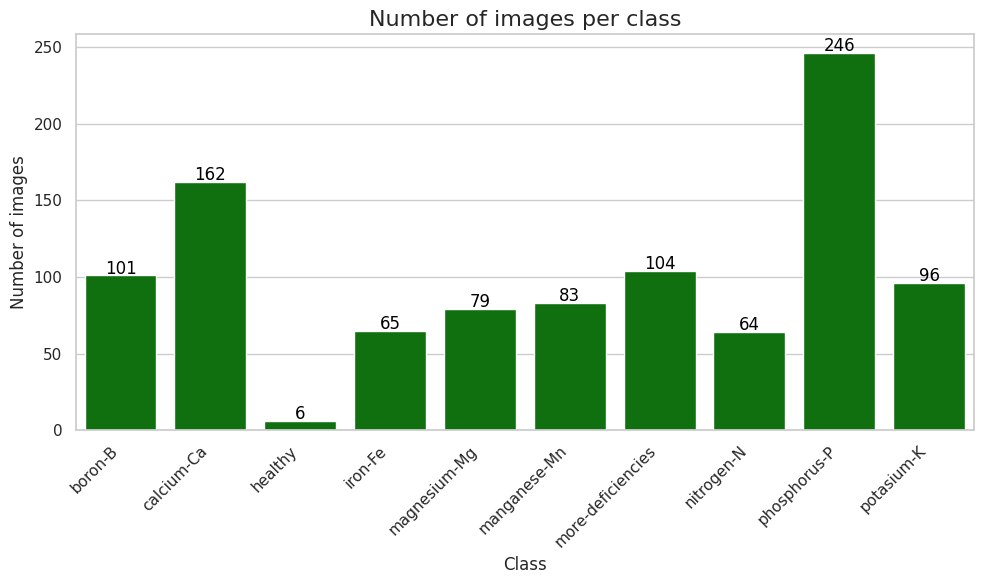

In [11]:
# Plot number of images per class
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Class", y="Number of images", data=df, color='green')
ax.set_title("Number of images per class", fontsize=16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.savefig(os.path.join(GRAPH_OUTPUT, 'images_per_class.png'))
plt.show()

## Data augmentation